In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [17]:
x = np.linspace(0, 10, 10_000) + np.random.normal(0, 1, 10_000)
y = np.power(x, 2)/14 + np.random.normal(0, 1, 10_000)
# y = np.linspace(0, 10, 10_000) + np.random.normal(0, 1, 10_000)

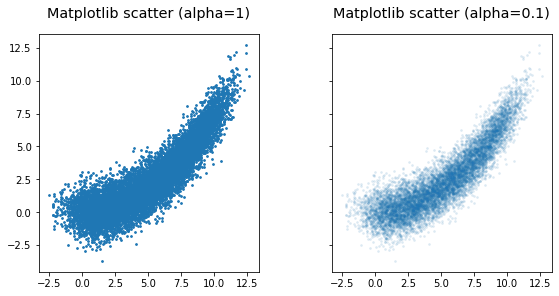

In [18]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4), 
                        gridspec_kw={"wspace":0.1, "hspace":0.1},
                        sharex=True, sharey=True, constrained_layout=True)
# scatter plot
axs[0].scatter(x, y, s=3)

# scatter plot with transparancy
axs[1].scatter(x, y, s=3, alpha=0.1)

# titles
titles = ["Matplotlib scatter (alpha=1)", "Matplotlib scatter (alpha=0.1)"]
for ax, title in zip(axs, titles):
    ax.set_title(title, fontsize="x-large", pad=16)
    ax.set_aspect(1)

fig.savefig("90_density2d_01.png")

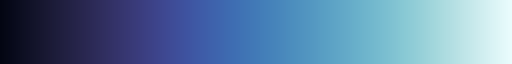

In [19]:
import cmocean.cm as cmo
cmap = cmo.ice
cmap

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'thread'
  **contour_kws,


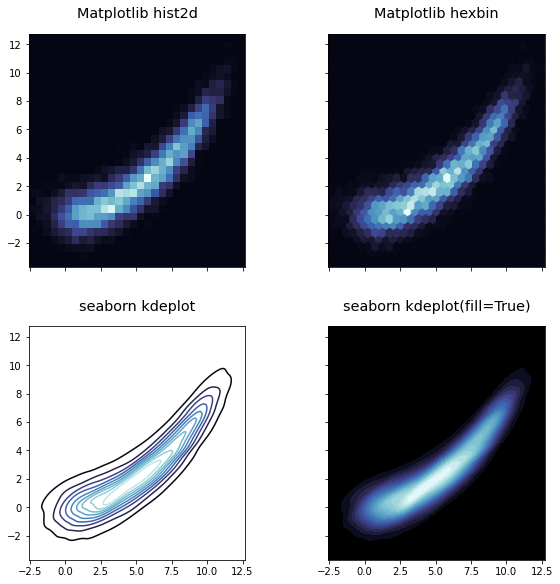

In [29]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 8), 
                         gridspec_kw={"wspace":0.1, "hspace":0.1},
                         sharex=True, sharey=True, constrained_layout=True)

# 2D histogram
axes[0, 0].hist2d(x, y, cmap=cmap, bins=30)

# hexbin
axes[0, 1].hexbin(x, y, cmap=cmap, gridsize=30)

# 2D KDE plot (contour)
sns.kdeplot(x, y, cmap=cmap, ax=axes[1, 0])

# 2D KDE plot (fill)
sns.kdeplot(x, y, cmap=cmap, fill=True, thread=0, levels=20, ax=axes[1, 1])
axes[1, 1].set_facecolor("k")

# titles
titles = ["Matplotlib hist2d", "Matplotlib hexbin", "seaborn kdeplot", "seaborn kdeplot(fill=True)"]
for ax, title in zip(axes.ravel(), titles):
    ax.set_title(title, fontsize="x-large", pad=16)
    ax.set_aspect(1)
    
fig.savefig("90_density2d_02.png")

In [30]:
axes[0, 0].get_children()[0]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


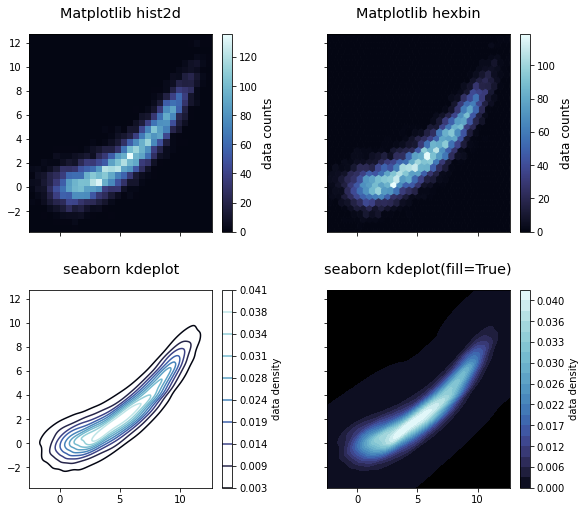

In [31]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 7), 
                         gridspec_kw={"wspace":0.1, "hspace":0.1},
                         sharex=True, sharey=True, constrained_layout=True)
axs = axes.ravel()

# 2D histogram
_, _, _, im0 = axs[0].hist2d(x, y, cmap=cmap, bins=30)
cbar0 = plt.colorbar(im0, ax=axs[0])
cbar0.set_label("data counts", fontsize="large")

# hexbin
im1 = axs[1].hexbin(x, y, cmap=cmap, gridsize=30)
cbar1 = plt.colorbar(im1, ax=axs[1])
cbar1.set_label("data counts", fontsize="large")

# 2D KDE plot (contour)
sns.kdeplot(x, y, cmap=cmap, ax=axs[2], 
            cbar=True, cbar_kws={"label":"data density", "format":"%.3f"})

# 2D KDE plot (fill)
sns.kdeplot(x, y, cmap=cmap, fill=True, thresh=0, levels=20, ax=axs[3], 
            cbar=True, cbar_kws={"label":"data density", "format":"%.3f"})
axs[3].set_facecolor("k")

# titles
titles = ["Matplotlib hist2d", "Matplotlib hexbin", "seaborn kdeplot", "seaborn kdeplot(fill=True)"]
for ax, title in zip(axes.ravel(), titles):
    ax.set_title(title, fontsize="x-large", pad=16)
    ax.set_aspect(1)
    
fig.savefig("90_density2d_03.png")

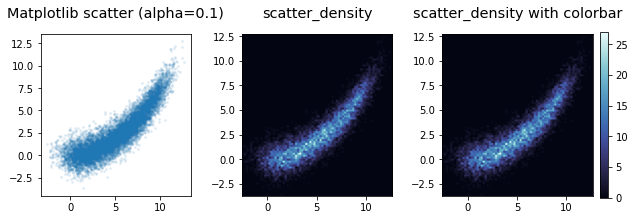

In [41]:
import mpl_scatter_density

fig, axs = plt.subplots(ncols=3, figsize=(9, 3), subplot_kw={"projection":"scatter_density"},
                        gridspec_kw={"wspace":0.1}, constrained_layout=True)

# scatter plot with transparancy
axs[0].scatter(x, y, s=3, alpha=0.1)

# scatter density
axs[1].scatter_density(x, y, cmap=cmap, dpi=36)

# scatter density with colormap
im2 = axs[2].scatter_density(x, y, cmap=cmap, dpi=36)
plt.colorbar(im2, ax=axs[2])

# titles
titles = ["Matplotlib scatter (alpha=0.1)", "scatter_density", "scatter_density with colorbar"]
for ax, title in zip(axs, titles):
    ax.set_title(title, fontsize="x-large", pad=16)
    ax.set_aspect(1)

fig.savefig("90_density2d_04.png")

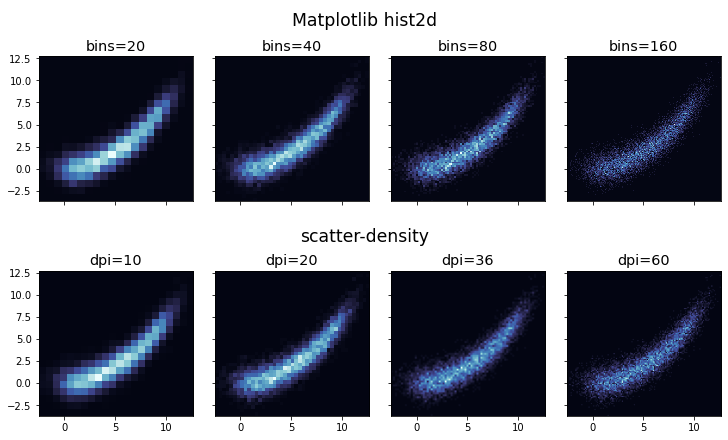

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6), subplot_kw={"projection":"scatter_density"},
                         sharex=True, sharey=True,
                         gridspec_kw={"wspace":0.1, "hspace":0.15}, constrained_layout=True)

# hist2d
axs_h2 = axes[0, :]
bins = [20, 40, 80, 160]
for ax, b in zip(axs_h2, bins):
    ax.hist2d(x, y, bins=b, cmap=cmap)
    ax.set_title(f"\n\nbins={b}", fontsize="x-large")
fig.text(0.5, 0.95, "Matplotlib hist2d", ha="center", fontsize="xx-large")
    
# scatter_density
axs_sd = axes[1, :]
dpis = [10, 20, 36, 60]
for ax, d in zip(axs_sd, dpis):
    ax.scatter_density(x, y, dpi=d, cmap=cmap)
    ax.set_title(f"\ndpi={d}", fontsize="x-large")
fig.text(0.5, 0.45, "scatter-density", ha="center", fontsize="xx-large")

fig.savefig("90_density2d_05.png")

In [42]:
axes[0, 0].get_children()[0]

In [43]:
axes[1, 0].get_children()[0]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/opt/conda/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


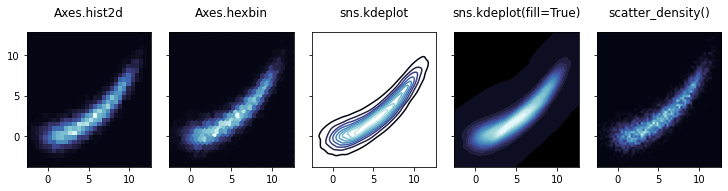

In [38]:
fig, axs = plt.subplots(ncols=5, figsize=(10, 3), subplot_kw={"projection":"scatter_density"}, 
                         gridspec_kw={"wspace":0.1, "hspace":0.1},
                         sharex=True, sharey=True, constrained_layout=True)

# 2D histogram
axs[0].hist2d(x, y, cmap=cmap, bins=30)

# hexbin
axs[1].hexbin(x, y, cmap=cmap, gridsize=30)

# 2D KDE plot (contour)
sns.kdeplot(x, y, cmap=cmap, ax=axs[2])

# 2D KDE plot (fill)
sns.kdeplot(x, y, cmap=cmap, fill=True, thresh=0, levels=20, ax=axs[3])
axs[3].set_facecolor("k")

# scatter-density
axs[4].scatter_density(x, y, dpi=36, cmap=cmap)


# titles
titles = ["Axes.hist2d", "Axes.hexbin", "sns.kdeplot", "sns.kdeplot(fill=True)", "scatter_density()"]
for ax, title in zip(axs, titles):
    ax.set_title(title, fontsize="large", pad=16)
    ax.set_aspect(1)
    
fig.savefig("90_density2d_00.png")